# Exercises
## 1. Attendance Data

**Load the attendance.csv file and calculate an attendance percentage for each student. One half day is worth 50% of a full day, and 10 tardies is equal to one absence.**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from pydataset import data

In [19]:
attendance = pd.read_csv('untidy-data/attendance.csv')
attendance

,Unnamed: 0,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08
0,Sally,P,T,T,H,P,A,T,T
1,Jane,A,P,T,T,T,T,A,T
2,Billy,A,T,A,A,H,T,P,T
3,John,P,T,H,P,P,T,P,P


In [22]:
att_melt = attendance.melt(id_vars='Unnamed: 0',var_name = 'date', value_name='attendance_code')
att_melt

,Unnamed: 0,date,attendance_code
0,Sally,2018-01-01,P
1,Jane,2018-01-01,A
2,Billy,2018-01-01,A
3,John,2018-01-01,P
4,Sally,2018-01-02,T
5,Jane,2018-01-02,P
6,Billy,2018-01-02,T
7,John,2018-01-02,T
8,Sally,2018-01-03,T
9,Jane,2018-01-03,T


In [24]:
att_melt.columns = ['student_name', 'date', 'attendance_code']

In [25]:
def convert_att_code(x):
    if x == 'P':
        return 1
    elif x == 'H':
        return 0.5
    elif x == 'T':
        return 0.9
    else:
        return 0

In [27]:
att_melt['att_percentage'] = att_melt['attendance_code'].apply(convert_att_code)
att_melt

,student_name,date,attendance_code,att_percentage
0,Sally,2018-01-01,P,1.0
1,Jane,2018-01-01,A,0.0
2,Billy,2018-01-01,A,0.0
3,John,2018-01-01,P,1.0
4,Sally,2018-01-02,T,0.9
5,Jane,2018-01-02,P,1.0
6,Billy,2018-01-02,T,0.9
7,John,2018-01-02,T,0.9
8,Sally,2018-01-03,T,0.9
9,Jane,2018-01-03,T,0.9


In [29]:
att_melt.groupby('student_name').att_percentage.mean()

student_name
Billy    0.5250
Jane     0.6875
John     0.9125
Sally    0.7625
Name: att_percentage, dtype: float64

## Coffee Levels

#### - a. Read the coffee_levels.csv file.
#### - b. Transform the data so that each carafe is in it's own column.
#### - c. Is this the best shape for the data?

### a.

In [54]:
coffee = pd.read_csv('untidy-data/coffee_levels.csv')
coffee

,hour,coffee_carafe,coffee_amount
0,8,x,0.816164
1,9,x,0.451018
2,10,x,0.843279
3,11,x,0.335533
4,12,x,0.898291
5,13,x,0.310711
6,14,x,0.507288
7,15,x,0.215043
8,16,x,0.183891
9,17,x,0.391560


### b.

In [46]:
coff_pivot = coffee.pivot_table(index = 'hour', columns = 'coffee_carafe', values = 'coffee_amount')

### c.
### Is this the best shape for the data?

The plot below shows how carafe y has one of the highest peaks at hour 13, and has the lowest drop at hour 12. Because the data can be read to make certain decisions, like maybe considering lowering the price at the slow hours, I conclude that this is the best shape for the data.

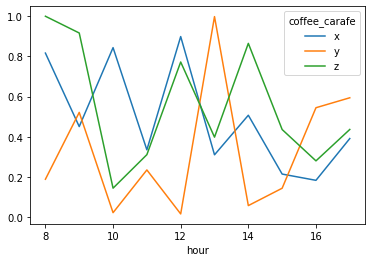

In [47]:
coff_pivot.plot();

## 3. Cake Recipes

#### - a. Read the cake_recipes.csv data. This data set contains cake tastiness scores for combinations of different recipes, oven rack positions, and oven temperatures.

#### - b. Tidy the data as necessary.

#### - c. Which recipe, on average, is the best? recipe b

#### - d. Which oven temperature, on average, produces the best results? 275

#### - e. Which combination of recipe, rack position, and temperature gives the best result? recipe b, bottom rack, 300 degrees

### a.

In [56]:
cake_recipes = pd.read_csv('untidy-data/cake_recipes.csv')
cake_recipes

,recipe:position,225,250,275,300
0,a:bottom,61.738655,53.912627,74.414730,98.786784
1,a:top,51.709751,52.009735,68.576858,50.228470
2,b:bottom,57.095320,61.904369,61.196980,99.248541
3,b:top,82.455004,95.224151,98.594881,58.169349
4,c:bottom,96.470207,52.001358,92.893227,65.473084
5,c:top,71.306308,82.795477,92.098049,53.960273
6,d:bottom,52.799753,58.670419,51.747686,56.183110
7,d:top,96.873178,76.101363,59.571620,50.971626


### b.

In [57]:
cake_recipes['recipe:position'].str.split(":", expand = True)

,0,1
0,a,bottom
1,a,top
2,b,bottom
3,b,top
4,c,bottom
5,c,top
6,d,bottom
7,d,top


In [59]:
cake_recipes[['recipe', 'position']] = cake_recipes['recipe:position'].str.split(':', expand = True)

In [60]:
cake_recipes.drop(columns = 'recipe:position', inplace = True)
cake_recipes

,225,250,275,300,recipe,position
0,61.738655,53.912627,74.414730,98.786784,a,bottom
1,51.709751,52.009735,68.576858,50.228470,a,top
2,57.095320,61.904369,61.196980,99.248541,b,bottom
3,82.455004,95.224151,98.594881,58.169349,b,top
4,96.470207,52.001358,92.893227,65.473084,c,bottom
5,71.306308,82.795477,92.098049,53.960273,c,top
6,52.799753,58.670419,51.747686,56.183110,d,bottom
7,96.873178,76.101363,59.571620,50.971626,d,top


In [66]:
cake_recipes_melt = cake_recipes.melt(id_vars = ['recipe', 'position'], var_name = 'temperature', value_name = 'score')

In [77]:
cake_recipes_melt.head()

,recipe,position,temperature,score
0,a,bottom,225,61.738655
1,a,top,225,51.709751
2,b,bottom,225,57.095320
3,b,top,225,82.455004
4,c,bottom,225,96.470207


### c. Which recipe is best, on average?

In [74]:
best_recipe_score = cake_recipes_melt.groupby(['recipe']).score.mean().max()
best_recipe_id = cake_recipes_melt.groupby(['recipe']).score.mean().idxmax()

print(f' The best recipe is \'{best_recipe_id}\' with a score of {round(best_recipe_score, 1)}')

 The best recipe is 'b' with a score of 76.7


### d. Which oven temperature, on average, produces the best results? 

In [86]:
best_temp = cake_recipes_melt.groupby(['temperature']).score.mean().idxmax()
best_score = cake_recipes_melt.groupby(['temperature']).score.mean().max()
print(f' The best temperature is \'{best_temp} F\' with a score of {round(best_score, 1)}')

 The best temperature is '275 F' with score of 74.9


###  e. Which combination of recipe, rack position, and temperature gives the best result? recipe b, bottom rack, 300 degrees

In [95]:
best_combo_score = cake_recipes_melt.groupby(['recipe', 'temperature', 'position']).score.mean().max()
best_combo = cake_recipes_melt.groupby(['recipe', 'temperature', 'position']).score.mean().idxmax()

print(f' The best combination of recipe is recipe \'{best_combo[0]} \' with an oven temp of \'{best_combo[1]} F\', the position\'{best_combo[2]}\' and a score of {round(best_combo_score, 1)}')

 The best combination of recipe is recipe 'b ' with an oven temp of '300 F', the position'bottom' and a score of 99.2
